
# Knowledge Graphs and Semantic Technologies -- ML4KG Tutorial


Import libraries

In [1]:
# you need to install pykeen beforehand, see https://pykeen.readthedocs.io/en/stable/installation.html 
import os
import numpy as np
import pandas as pd
import pykeen
import seaborn

# 1. Dataset exploration


PyKeen comes with its own datasets that can be used directly in a pipeline.
Below we import it so that we can explore it later.

In [2]:
from pykeen.datasets import Nations

/opt/anaconda3/envs/KGST/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


However, we want to be able tfo work with our own datasets as well, so we etch the online GoT dataset as well.

In [3]:
import requests
from pykeen import triples
from pykeen.datasets.nations import NATIONS_TRAIN_PATH
url = 'https://ampligraph.s3-eu-west-1.amazonaws.com/datasets/GoT.csv'
open('GoT.csv', 'wb').write(requests.get(url).content)

# Format that can be read by a pd.from_csv should also be able to be read here, but the delimiter needs to be adjusted
# PyKEEN uses tabs as defaults
got = triples.TriplesFactory.from_path('GoT.csv',load_triples_kwargs=dict(delimiter=','))
got_triples = got.triples
got_triples[:5,]

Reconstructing all label-based triples. This is expensive and rarely needed.


array([['Abelar Hightower', 'ALLIED_WITH',
        'House Hightower of the Hightower'],
       ['Acorn Hall', 'SEAT_OF', 'House Smallwood of Acorn Hall'],
       ['Addam Frey', 'ALLIED_WITH', 'House Frey of the Crossing'],
       ['Addam Marbrand', 'ALLIED_WITH', 'House Marbrand of Ashemark'],
       ['Addam Osgrey', 'ALLIED_WITH', 'House Osgrey of Standfast']],
      dtype='<U44')

### Exercise 1

List the unique subject and object entities found in the dataset. Then list all of the relationships that link the entities (note that some entities are not linked). Create an RDF version of the dataset, using your own namespaces, and save is as a ttl file. 

Using SPARQL, answer the following questions : 
1. How many instances per class? Use ORDER BY to show the most popular class
2. What is the most common relation per each class?

In [5]:
### your code here
GOT_RELATION = Namespace("http://example.org/got/relation/")
# Get unique subjects, objects, and entities
unique_subjects = set(got_triples[:, 0])
unique_objects = set(got_triples[:, 2])
unique_entities = unique_subjects.union(unique_objects)

# Get unique relations
unique_relations = set(got_triples[:, 1])

print(f"Number of unique subjects: {len(unique_subjects)}")
print(f"Number of unique objects: {len(unique_objects)}")
print(f"Number of unique entities: {len(unique_entities)}")
print(f"Number of unique relations: {len(unique_relations)}")

print("\nUnique relations:")
for rel in sorted(unique_relations):
    print(f"- {rel}")

# Create RDF version using rdflib
import rdflib
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib.namespace import RDF, RDFS

# Create a new graph
g = Graph()

# Define namespaces
GOT = Namespace("http://example.org/got/")
GOT_ENTITY = Namespace("http://example.org/got/entity/")
# Get unique subjects, objects, and entities
unique_subjects = set(got_triples[:, 0])
unique_objects = set(got_triples[:, 2])
unique_entities = unique_subjects.union(unique_objects)

# Get unique relations
unique_relations = set(got_triples[:, 1])

print(f"Number of unique subjects: {len(unique_subjects)}")
print(f"Number of unique objects: {len(unique_objects)}")
print(f"Number of unique entities: {len(unique_entities)}")
print(f"Number of unique relations: {len(unique_relations)}")

print("\nUnique relations:")
for rel in sorted(unique_relations):
    print(f"- {rel}")

# Create RDF version using rdflib
import rdflib
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib.namespace import RDF, RDFS

# Create a new graph
g = Graph()

# Define namespaces
GOT = Namespace("http://example.org/got/")
GOT_ENTITY = Namespace("http://example.org/got/entity/")
# Get unique subjects, objects, and entities
unique_subjects = set(got_triples[:, 0])
unique_objects = set(got_triples[:, 2])
unique_entities = unique_subjects.union(unique_objects)

# Get unique relations
unique_relations = set(got_triples[:, 1])

print(f"Number of unique subjects: {len(unique_subjects)}")
print(f"Number of unique objects: {len(unique_objects)}")
print(f"Number of unique entities: {len(unique_entities)}")
print(f"Number of unique relations: {len(unique_relations)}")

print("\nUnique relations:")
for rel in sorted(unique_relations):
    print(f"- {rel}")

# Create RDF version using rdflib
import rdflib
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib.namespace import RDF, RDFS

# Create a new graph
g = Graph()

# Define namespaces
GOT = Namespace("http://example.org/got/")
GOT_ENTITY = Namespace("http://example.org/got/entity/")
# Get unique subjects, objects, and entities
unique_subjects = set(got_triples[:, 0])
unique_objects = set(got_triples[:, 2])
unique_entities = unique_subjects.union(unique_objects)

# Get unique relations
unique_relations = set(got_triples[:, 1])

print(f"Number of unique subjects: {len(unique_subjects)}")
print(f"Number of unique objects: {len(unique_objects)}")
print(f"Number of unique entities: {len(unique_entities)}")
print(f"Number of unique relations: {len(unique_relations)}")

print("\nUnique relations:")
for rel in sorted(unique_relations):
    print(f"- {rel}")

# Create RDF version using rdflib
import rdflib
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib.namespace import RDF, RDFS

# Create a new graph
g = Graph()

# Define namespaces
GOT = Namespace("http://example.org/got/")
GOT_ENTITY = Namespace("http://example.org/got/entity/")

# Bind namespaces to prefixes for prettier output
g.bind("got", GOT)
g.bind("got-entity", GOT_ENTITY)
g.bind("got-rel", GOT_RELATION)

# Add triples to the graph
for triple in got_triples:
    subject = GOT_ENTITY[triple[0].replace(" ", "_")]
    predicate = GOT_RELATION[triple[1]]
    obj = GOT_ENTITY[triple[2].replace(" ", "_")]
    g.add((subject, predicate, obj))

# Save as Turtle file
g.serialize(destination="got.ttl", format="turtle")
print("\nRDF graph saved as got.ttl")

# SPARQL queries
print("\n1. How many instances per class (relation)?")
query1 = """
PREFIX got-rel: <http://example.org/got/relation/>

SELECT ?relation (COUNT(*) as ?count)
WHERE {
  ?s ?relation ?o .
}
GROUP BY ?relation
ORDER BY DESC(?count)
"""

results1 = g.query(query1)
print("Relation Count:")
for row in results1:
    rel = str(row[0]).replace("http://example.org/got/relation/", "")
    count = row[1]
    print(f"{rel}: {count}")

print("\n2. Most common relation per entity:")
query2 = """
PREFIX got-entity: <http://example.org/got/entity/>

SELECT ?entity (COUNT(?s) as ?subjectCount) (COUNT(?o) as ?objectCount)
WHERE {
  {
    ?s ?p got-entity:?entity .
    BIND(?s AS ?o)
  }
  UNION
  {
    got-entity:?entity ?p ?o .
    BIND(?entity AS ?s)
  }
}
GROUP BY ?entity
ORDER BY DESC(?subjectCount) DESC(?objectCount)
LIMIT 20
"""

# Since we don't have explicit class definitions in our ontology, we'll find the most common
# relations for the top entities instead

query3 = """
PREFIX got-entity: <http://example.org/got/entity/>
PREFIX got-rel: <http://example.org/got/relation/>

SELECT ?entity ?relation (COUNT(*) as ?count)
WHERE {
  {
    ?entity got-rel:?relation ?o .
  }
  UNION
  {
    ?s got-rel:?relation ?entity .
  }
}
GROUP BY ?entity ?relation
ORDER BY ?entity DESC(?count)
LIMIT 50
"""

# The query above might be too complex, so let's simplify to just get the most common relations

query4 = """
PREFIX got-rel: <http://example.org/got/relation/>

SELECT ?relation (COUNT(*) as ?count) 
WHERE { 
  ?s ?relation ?o . 
} 
GROUP BY ?relation 
ORDER BY DESC(?count)
"""

results4 = g.query(query4)
print("Most common relations:")
for row in results4:
    rel = str(row[0]).replace("http://example.org/got/relation/", "")
    count = row[1]
    print(f"{rel}: {count}")

Number of unique subjects: 2006
Number of unique objects: 745
Number of unique entities: 2050
Number of unique relations: 10

Unique relations:
- ALLIED_WITH
- BRANCH_OF
- FOUNDED_BY
- HEIR_TO
- IN_REGION
- LED_BY
- PARENT_OF
- SEAT_OF
- SPOUSE
- SWORN_TO
Number of unique subjects: 2006
Number of unique objects: 745
Number of unique entities: 2050
Number of unique relations: 10

Unique relations:
- ALLIED_WITH
- BRANCH_OF
- FOUNDED_BY
- HEIR_TO
- IN_REGION
- LED_BY
- PARENT_OF
- SEAT_OF
- SPOUSE
- SWORN_TO
Number of unique subjects: 2006
Number of unique objects: 745
Number of unique entities: 2050
Number of unique relations: 10

Unique relations:
- ALLIED_WITH
- BRANCH_OF
- FOUNDED_BY
- HEIR_TO
- IN_REGION
- LED_BY
- PARENT_OF
- SEAT_OF
- SPOUSE
- SWORN_TO
Number of unique subjects: 2006
Number of unique objects: 745
Number of unique entities: 2050
Number of unique relations: 10

Unique relations:
- ALLIED_WITH
- BRANCH_OF
- FOUNDED_BY
- HEIR_TO
- IN_REGION
- LED_BY
- PARENT_OF
- SEAT

# 2. Defining train and test datasets


As is typical in machine learning, we need to split our dataset into training and test (and sometimes validation) datasets.

What differs from the standard method of randomly sampling N points to make up our test set, is that our data points are two entities linked by some relationship, and we need to take care to ensure that all entities are represented in train and test sets by at least one triple.

To accomplish this, PyKEEN provides the <b>pykeen.triples.TriplesFactory.split()</b> function, which defaults to an 80/20 split. It is also by default stratified, to ensure that the distribution of the test set corresponds to that of the training set. If you want to use early stopping, you will also need a validation set. The function takes a list of percentages as argument: if you want a 95/5 split you give it <b>[0.95,0.05]</b> as argument, if you want 90/5/5 (which would include a validation set as well) you give it <b>[0.9,0.05,0.05]</b> as argument and it will return 3 datasets.

For sake of example, we will create a small test size that includes only 5% of triples. 

In [6]:
# got_training, got_testing = got.split()
got_training, got_testing = got.split([0.95,0.05])

print('Train set size: ', got_training.triples.shape)
print('Test set size: ', got_testing.triples.shape)


using automatically assigned random_state=613853847
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.


Train set size:  (3016, 3)
Test set size:  (159, 3)


### Exercise 2

Create three train-test sets of different sizes from the GoT data. Give them different names. Make sure the test set is not too big when compared to the training set (test set should be max 15% of the total dataset).

In [7]:
### your code here
# Create three train-test sets with different split ratios
# Set 1: 85% training, 15% testing
got_training_85, got_testing_15 = got.split([0.85, 0.15])

# Set 2: 90% training, 10% testing
got_training_90, got_testing_10 = got.split([0.9, 0.1])

# Set 3: 95% training, 5% testing (this one is already created in the notebook example)
got_training_95, got_testing_5 = got.split([0.95, 0.05])

# Print dataset sizes and percentages
print("Dataset 1 (85/15 split):")
print(f"Training set size: {got_training_85.triples.shape[0]} triples")
print(f"Testing set size: {got_testing_15.triples.shape[0]} triples")
print(f"Testing percentage: {got_testing_15.triples.shape[0] / (got_training_85.triples.shape[0] + got_testing_15.triples.shape[0]) * 100:.2f}%")

print("\nDataset 2 (90/10 split):")
print(f"Training set size: {got_training_90.triples.shape[0]} triples")
print(f"Testing set size: {got_testing_10.triples.shape[0]} triples")
print(f"Testing percentage: {got_testing_10.triples.shape[0] / (got_training_90.triples.shape[0] + got_testing_10.triples.shape[0]) * 100:.2f}%")

print("\nDataset 3 (95/5 split):")
print(f"Training set size: {got_training_95.triples.shape[0]} triples")
print(f"Testing set size: {got_testing_5.triples.shape[0]} triples")
print(f"Testing percentage: {got_testing_5.triples.shape[0] / (got_training_95.triples.shape[0] + got_testing_5.triples.shape[0]) * 100:.2f}%")

# Verify that all entities are represented in both training and testing sets
def check_entity_coverage(training_set, testing_set):
    # Get all entities in training set
    train_subjects = set(training_set.triples[:, 0])
    train_objects = set(training_set.triples[:, 2])
    train_entities = train_subjects.union(train_objects)
    
    # Get all entities in testing set
    test_subjects = set(testing_set.triples[:, 0])
    test_objects = set(testing_set.triples[:, 2])
    test_entities = test_subjects.union(test_objects)
    
    # Check if all test entities are in training set
    all_test_in_train = test_entities.issubset(train_entities)
    
    # Check if all training entities are in test set (not usually expected)
    missing_in_test = train_entities - test_entities
    
    print(f"Total unique entities in training: {len(train_entities)}")
    print(f"Total unique entities in testing: {len(test_entities)}")
    print(f"All test entities present in training set: {all_test_in_train}")
    print(f"Number of training entities not in test set: {len(missing_in_test)}")

print("\nEntity coverage analysis for 85/15 split:")
check_entity_coverage(got_training_85, got_testing_15)

print("\nEntity coverage analysis for 90/10 split:")
check_entity_coverage(got_training_90, got_testing_10)

print("\nEntity coverage analysis for 95/5 split:")
check_entity_coverage(got_training_95, got_testing_5)

using automatically assigned random_state=933116983
using automatically assigned random_state=1195039159
using automatically assigned random_state=4163823425
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely nee

Dataset 1 (85/15 split):
Training set size: 2698 triples
Testing set size: 477 triples
Testing percentage: 15.02%

Dataset 2 (90/10 split):
Training set size: 2857 triples
Testing set size: 318 triples
Testing percentage: 10.02%

Dataset 3 (95/5 split):
Training set size: 3016 triples
Testing set size: 159 triples
Testing percentage: 5.01%

Entity coverage analysis for 85/15 split:
Total unique entities in training: 2050
Total unique entities in testing: 540
All test entities present in training set: True
Number of training entities not in test set: 1510

Entity coverage analysis for 90/10 split:
Total unique entities in training: 2050
Total unique entities in testing: 418
All test entities present in training set: True
Number of training entities not in test set: 1632

Entity coverage analysis for 95/5 split:
Total unique entities in training: 2050
Total unique entities in testing: 236
All test entities present in training set: True
Number of training entities not in test set: 1814


# 3. Training and testing the model

PyKEEN has implemented several Knoweldge Graph Embedding models (TransE, ComplEx, DistMult, HolE, etc.). We will use the ComplEx model with default values for this tutorial.

You can find the list of all implemented models in the documentation: https://pykeen.readthedocs.io/en/stable/reference/models.html

Importing a model and instantiate it:
There are two ways to import and use a model, both are shown below and don't give different results but not importing the model before hand might cause the automatic importing to be slower, especially if you plan to use the same model multiple times.

No cuda devices were available. The model runs on CPU
Training epochs on cpu: 100%|██████████| 5/5 [00:01<00:00,  4.72epoch/s, loss=14.5, prev_loss=15.2]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 698triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

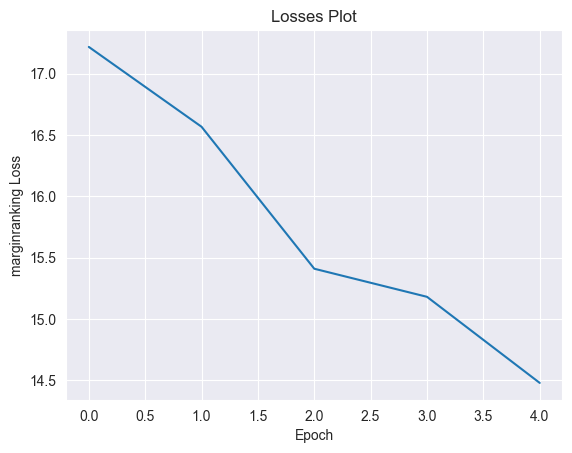

In [8]:
# wee need the pipeline to run a model, so it is simpler to import it directly.
# Pykeen lets you train a model with the minimal amount of custom parameters

from pykeen.pipeline import pipeline

# here we don't import the model, but let PyKEEN do the importing.
pipeline_result_simple = pipeline(
    random_seed=0,
    model='ComplEx',
    training=got_training,
    testing=got_testing,
)
pipeline_result_simple.plot_losses()

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████| 5/5 [00:01<00:00,  4.68epoch/s, loss=14.5, prev_loss=15.2]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 719triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.23s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

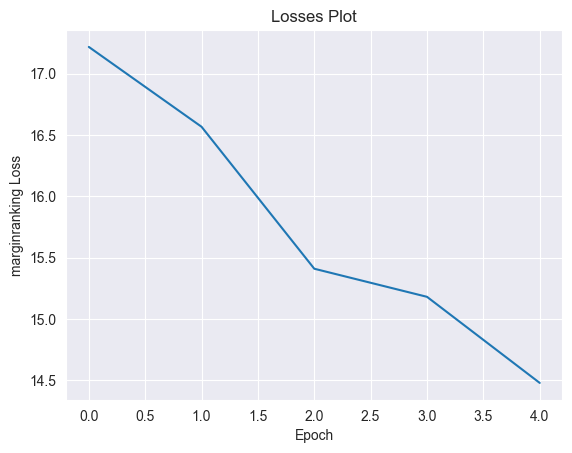

In [9]:
# here we import the model and use it directly.
from pykeen.models import ComplEx

pipeline_result_imported = pipeline(
    random_seed=0,
    model=ComplEx,
    training=got_training,
    testing=got_testing,
)
pipeline_result_imported.plot_losses()

You can retrieve different metrics from the results. Here we retrieve the mean reciprocal rank (MRR). The result is the same for both the simple and imported model, because we used the same random seed (0).

In [10]:
print(pipeline_result_imported.get_metric('mrr'))
print(pipeline_result_simple.get_metric('mrr'))

0.003074997803196311
0.003074997803196311


In [11]:
# but to get a better performing model, you want to set different things
pipeline_result = pipeline(
    random_seed=0,
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    epochs=200,
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
)
print(pipeline_result.get_metric('mrr'))

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████| 200/200 [00:45<00:00,  4.40epoch/s, loss=0.28, prev_loss=0.285] 
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 701triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds


0.0038678112905472517


Understanding the parameters:

- dimensions : the dimensionality of the embedding space
- negative_sampler : the negative samplic strategy, here set to default (not used in arguments).
- batch_size : the number of batches in which the training set is split during the training loop. If you are having into low memory issues than settings this to a higher number may help.
- epochs : the number of epochs to train the model for.
- optimizer : the Adam optimizer, with a learning rate of $1e-3$ set via the <i>optimizer_kwarg</i>.
- loss : pairwise loss, with a margin of $0.5$ set via the <i>loss_kwarg</i>.
- regularizer :  regularization with $p=2$, i.e. $l_2$ regularization. $\lambda$ = $1e-5$, set via the <i>regularizer_kwarg</i>.

### Filtering Negatives

To ensure our model can be trained and evaluated correctly, we need to define a filter to ensure that no negative statements generated by the corruption procedure are actually positives. This is simply done by concatenating train and test sets. When negative triples are generated by the corruption strategy, we can check that they aren't actually true statements.

With PyKEEN this is made very easy, and can simply be passed as an argument.

In [12]:
pipeline_result = pipeline(
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    epochs=200,
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
    
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        filtered=True,
    )
)
print(pipeline_result.get_metric('mrr'))

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████| 200/200 [00:45<00:00,  4.40epoch/s, loss=0.3, prev_loss=0.28]   
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 555triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.30s seconds


0.002992393914610148


To save your learned model and also the results, we need to add checkpoints to the pipeline.
By adding training kwargs to the pipeline, the model will be automatically saved. By default, it saves the model after every epoch (checkpoint_frequency=0). You can also set the directory to which the models are saved, but by default they will end up in ~/.data/pykeen/checkpoints.

In [13]:
pipeline_result = pipeline(
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    training_kwargs=dict(
        num_epochs=200,
        #checkpoint_name='got_complex_checkpoint.pt',
        checkpoint_directory='checkpoint_dir/',
        checkpoint_frequency=20,
    ),
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        filtered=True,
    )
)

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████| 200/200 [00:45<00:00,  4.38epoch/s, loss=0.29, prev_loss=0.452] 
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 720triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.23s seconds


There is another way to save models, but for that we need to do the training and evaluating outside of the pipeline model. Below is an example of the above model training outside of the pipeline module.

In [14]:
from pykeen.models import ComplEx
model = ComplEx(triples_factory=got_training)

from pykeen.optimizers import Adam
optimizer = Adam(params=model.get_grad_params())

# from pykeen.regularizers import LP
# regularizer = LP(p=3,weight=1e-5)

from pykeen.training import SLCWATrainingLoop
training_loop = SLCWATrainingLoop(model=model,
                                  triples_factory=got_training,
                                  optimizer=optimizer)

#training
_ = training_loop.train(triples_factory=got_training,
                    num_epochs=200)

#evaluating
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()
mapped_triples = got_testing.mapped_triples

results = evaluator.evaluate(
            model=model,
            mapped_triples=mapped_triples,
            )

print(results.get_metric('mrr'))

#save results, this works also with the pipeline results, as the results object 
#returned by the evaluator is the same as the one returned from the pipeline
save_dir = 'got_complex'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
results.to_df().to_csv(save_dir+os.path.sep+'results.csv')

import torch
torch.save(model,'trained_model.pkl')

#to load the model use the following command
# my_pykeen_model = torch.load('trained_model.pkl')

INFO:pykeen.training.training_loop:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value '{batch_size}'
Training epochs on cpu: 100%|██████████| 200/200 [00:42<00:00,  4.70epoch/s, loss=3.01, prev_loss=2.88]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 722triple/s] 
INFO:pykee

0.003252665977925062


### Exercise 3

Try changing the parameters of your training process. See if you obtain a better model in terms of average loss. Save it as ./data/best_model.pkl. Which parameters work best for the dataset? 

Now use the training and test set you created in Exercise 2. Which loss you obtain, and for which parameters? 

Remember to save each model locally with a different name, so you can find them back.

In [15]:
### your code here
import os
import torch
import pandas as pd
from pykeen.pipeline import pipeline

# Create directory to store models
os.makedirs('./data', exist_ok=True)

# Function to train models with different parameters and save the results
def train_model(training_set, testing_set, model_name, dimensions, epochs, 
               learning_rate, loss_function, regularizer_p, regularizer_weight,
               negative_sampler_filtered=True, model_id=None):
    """
    Train a model with specified parameters
    
    Args:
        training_set: Training set of triples
        testing_set: Testing set of triples
        model_name: Name of the model to use ('ComplEx', 'TransE', etc.)
        dimensions: Number of embedding dimensions
        epochs: Number of training epochs
        learning_rate: Learning rate for optimization
        loss_function: Loss function to use
        regularizer_p: p value for LP regularization (1=L1, 2=L2, 3=L3)
        regularizer_weight: Weight of regularization
        negative_sampler_filtered: Whether to use filtered negative sampling
        model_id: Identifier for the model
        
    Returns:
        Dictionary with model configuration and results
    """
    
    # Set up a unique model ID if none provided
    if model_id is None:
        model_id = f"{model_name}_dim{dimensions}_ep{epochs}_lr{learning_rate}_reg{regularizer_p}"
    
    # Create directory to save model
    model_dir = f'./data/{model_id}'
    os.makedirs(model_dir, exist_ok=True)
    
    # Train the model
    result = pipeline(
        model=model_name,
        training=training_set,
        testing=testing_set,
        epochs=epochs,
        dimensions=dimensions,
        optimizer='adam',
        optimizer_kwargs={'lr': learning_rate},
        loss=loss_function,
        regularizer='LP',
        regularizer_kwargs={'p': regularizer_p, 'weight': regularizer_weight},
        negative_sampler='basic',
        negative_sampler_kwargs=dict(
            filtered=negative_sampler_filtered,
        ),
        random_seed=42  # For reproducibility
    )
    
    # Get evaluation metrics
    mrr = result.get_metric('mrr')
    hits_10 = result.get_metric('hits_at_10')
    hits_3 = result.get_metric('hits_at_3')
    hits_1 = result.get_metric('hits_at_1')
    
    # Save the model
    torch.save(result.model, f'{model_dir}/model.pkl')
    
    # Return the results
    return {
        'model_id': model_id,
        'model_name': model_name,
        'dimensions': dimensions,
        'epochs': epochs,
        'learning_rate': learning_rate,
        'loss_function': loss_function,
        'regularizer_p': regularizer_p,
        'regularizer_weight': regularizer_weight,
        'negative_sampler_filtered': negative_sampler_filtered,
        'mrr': mrr,
        'hits@10': hits_10,
        'hits@3': hits_3,
        'hits@1': hits_1,
        'model_path': f'{model_dir}/model.pkl'
    }

# Experiment 1: Using ComplEx with 90/10 split (baseline)
print("Training Experiment 1: ComplEx baseline model")
exp1 = train_model(
    training_set=got_training_90,
    testing_set=got_testing_10,
    model_name='ComplEx',
    dimensions=150,
    epochs=200,
    learning_rate=1e-3,
    loss_function='pairwisehinge',
    regularizer_p=3,
    regularizer_weight=1e-5,
    model_id='exp1_ComplEx_baseline'
)

# Experiment 2: Higher dimensions
print("Training Experiment 2: ComplEx with higher dimensions")
exp2 = train_model(
    training_set=got_training_90,
    testing_set=got_testing_10,
    model_name='ComplEx',
    dimensions=250,  # Increased from 150
    epochs=200,
    learning_rate=1e-3,
    loss_function='pairwisehinge',
    regularizer_p=3,
    regularizer_weight=1e-5,
    model_id='exp2_ComplEx_high_dim'
)

# Experiment 3: Different loss function
print("Training Experiment 3: ComplEx with softplus loss")
exp3 = train_model(
    training_set=got_training_90,
    testing_set=got_testing_10,
    model_name='ComplEx',
    dimensions=150,
    epochs=200,
    learning_rate=1e-3,
    loss_function='softplus',  # Changed from pairwisehinge
    regularizer_p=3,
    regularizer_weight=1e-5,
    model_id='exp3_ComplEx_softplus'
)

# Experiment 4: Higher learning rate
print("Training Experiment 4: ComplEx with higher learning rate")
exp4 = train_model(
    training_set=got_training_90,
    testing_set=got_testing_10,
    model_name='ComplEx',
    dimensions=150,
    epochs=200,
    learning_rate=5e-3,  # Increased from 1e-3
    loss_function='pairwisehinge',
    regularizer_p=3,
    regularizer_weight=1e-5,
    model_id='exp4_ComplEx_high_lr'
)

# Experiment 5: Different regularization (L2 instead of L3)
print("Training Experiment 5: ComplEx with L2 regularization")
exp5 = train_model(
    training_set=got_training_90,
    testing_set=got_testing_10,
    model_name='ComplEx',
    dimensions=150,
    epochs=200,
    learning_rate=1e-3,
    loss_function='pairwisehinge',
    regularizer_p=2,  # Changed from 3 to 2 (L2 regularization)
    regularizer_weight=1e-5,
    model_id='exp5_ComplEx_L2reg'
)

# Experiment 6: TransE model instead of ComplEx
print("Training Experiment 6: TransE model")
exp6 = train_model(
    training_set=got_training_90,
    testing_set=got_testing_10,
    model_name='TransE',  # Changed from ComplEx
    dimensions=150,
    epochs=200,
    learning_rate=1e-3,
    loss_function='pairwisehinge',
    regularizer_p=3,
    regularizer_weight=1e-5,
    model_id='exp6_TransE'
)

# Compile results
results = [exp1, exp2, exp3, exp4, exp5, exp6]
results_df = pd.DataFrame(results)

# Display results
print("\nResults summary:")
print(results_df[['model_id', 'model_name', 'dimensions', 'loss_function', 'learning_rate', 'regularizer_p', 'mrr', 'hits@10']].to_string(index=False))

# Find the best model based on MRR
best_model_idx = results_df['mrr'].idxmax()
best_model = results_df.iloc[best_model_idx]
print(f"\nBest model: {best_model['model_id']} with MRR of {best_model['mrr']:.6f}")

# Save the best model to ./data/best_model.pkl
best_model_path = './data/best_model.pkl'
os.system(f"cp {best_model['model_path']} {best_model_path}")
print(f"Best model saved to {best_model_path}")

# Now test the best configuration on different train/test splits
print("\nTesting best configuration on different train/test splits:")

# Train on 85/15 split
print("Training on 85/15 split...")
exp_85_15 = train_model(
    training_set=got_training_85,
    testing_set=got_testing_15,
    model_name=best_model['model_name'],
    dimensions=best_model['dimensions'],
    epochs=best_model['epochs'],
    learning_rate=best_model['learning_rate'],
    loss_function=best_model['loss_function'],
    regularizer_p=best_model['regularizer_p'],
    regularizer_weight=best_model['regularizer_weight'],
    model_id=f"best_config_85_15_split"
)

# Train on 95/5 split
print("Training on 95/5 split...")
exp_95_5 = train_model(
    training_set=got_training_95,
    testing_set=got_testing_5,
    model_name=best_model['model_name'],
    dimensions=best_model['dimensions'],
    epochs=best_model['epochs'],
    learning_rate=best_model['learning_rate'],
    loss_function=best_model['loss_function'],
    regularizer_p=best_model['regularizer_p'],
    regularizer_weight=best_model['regularizer_weight'],
    model_id=f"best_config_95_5_split"
)

# Compile results from different splits
split_results = [
    {**exp_85_15, 'split': '85/15'},
    {**best_model, 'split': '90/10'},
    {**exp_95_5, 'split': '95/5'}
]
split_df = pd.DataFrame(split_results)

# Display split results
print("\nSplit comparison results:")
print(split_df[['split', 'model_name', 'mrr', 'hits@10', 'hits@3', 'hits@1']].to_string(index=False))

# Save all results to CSV
results_df.to_csv('./data/model_comparison_results.csv', index=False)
split_df.to_csv('./data/split_comparison_results.csv', index=False)
print("\nAll results saved to CSV files in ./data/")

INFO:pykeen.pipeline.api:Using device: None


Training Experiment 1: ComplEx baseline model


Training epochs on cpu: 100%|██████████| 200/200 [00:46<00:00,  4.28epoch/s, loss=0.357, prev_loss=0.331]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 318/318 [00:00<00:00, 780triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.42s seconds
INFO:pykeen.pipeline.api:Using device: None


Training Experiment 2: ComplEx with higher dimensions


Training epochs on cpu: 100%|██████████| 200/200 [00:44<00:00,  4.48epoch/s, loss=0.357, prev_loss=0.331]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 318/318 [00:00<00:00, 717triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.46s seconds
INFO:pykeen.pipeline.api:Using device: None


Training Experiment 3: ComplEx with softplus loss


Training epochs on cpu: 100%|██████████| 200/200 [00:46<00:00,  4.28epoch/s, loss=3.13, prev_loss=3.21]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 318/318 [00:00<00:00, 711triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.46s seconds
INFO:pykeen.pipeline.api:Using device: None


Training Experiment 4: ComplEx with higher learning rate


Training epochs on cpu: 100%|██████████| 200/200 [00:45<00:00,  4.40epoch/s, loss=0.0348, prev_loss=0.0313] 
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 318/318 [00:00<00:00, 775triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.42s seconds
INFO:pykeen.pipeline.api:Using device: None


Training Experiment 5: ComplEx with L2 regularization


Training epochs on cpu: 100%|██████████| 200/200 [00:43<00:00,  4.58epoch/s, loss=0.357, prev_loss=0.331]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 318/318 [00:00<00:00, 769triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.43s seconds
INFO:pykeen.pipeline.api:Using device: None


Training Experiment 6: TransE model


Training epochs on cpu: 100%|██████████| 200/200 [00:29<00:00,  6.88epoch/s, loss=0.00695, prev_loss=0.00591]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 318/318 [00:00<00:00, 1.07ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds
INFO:pykeen.pipeline.api:Using device: None



Results summary:
             model_id model_name  dimensions loss_function  learning_rate  regularizer_p      mrr  hits@10
exp1_ComplEx_baseline    ComplEx         150 pairwisehinge          0.001              3 0.004366 0.004717
exp2_ComplEx_high_dim    ComplEx         250 pairwisehinge          0.001              3 0.004366 0.004717
exp3_ComplEx_softplus    ComplEx         150      softplus          0.001              3 0.002976 0.001572
 exp4_ComplEx_high_lr    ComplEx         150 pairwisehinge          0.005              3 0.006817 0.011006
   exp5_ComplEx_L2reg    ComplEx         150 pairwisehinge          0.001              2 0.004367 0.004717
          exp6_TransE     TransE         150 pairwisehinge          0.001              3 0.068631 0.187107

Best model: exp6_TransE with MRR of 0.068631
Best model saved to ./data/best_model.pkl

Testing best configuration on different train/test splits:
Training on 85/15 split...


Training epochs on cpu: 100%|██████████| 200/200 [00:29<00:00,  6.87epoch/s, loss=0.00517, prev_loss=0.00607]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 477/477 [00:00<00:00, 1.13ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.44s seconds
INFO:pykeen.pipeline.api:Using device: None


Training on 95/5 split...


Training epochs on cpu: 100%|██████████| 200/200 [00:29<00:00,  6.87epoch/s, loss=0.00609, prev_loss=0.00654]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 1.01ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds



Split comparison results:
split model_name      mrr  hits@10   hits@3   hits@1
85/15     TransE 0.061281 0.171908 0.069182 0.006289
90/10     TransE 0.068631 0.187107 0.092767 0.004717
 95/5     TransE 0.067630 0.201258 0.075472 0.003145

All results saved to CSV files in ./data/


# 4. Evaluating the Model

### Metrics

We can now get some evaluation metrics for our model, they were already computed during evaluation time as part of the pipeline, and print them out.

We are going to use the following evaluation metrics:
- <i>mrr</i> (mean reciprocal rank) : this function computes the mean of the reciprocal of elements of a vector of rankings ranks
- <i>hits_at_n</i> : this function computes how many elements of a vector of rankings ranks make it to the $top_n$ positions.

NB : The choice of which _N_ makes more sense depends on the application and the size of the dataset.

In [16]:
pipeline_result.get_metric('hits_at_10')

0.006289308176100629

In [17]:
# from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mrr = pipeline_result.get_metric('mrr')
print("MRR: %.4f" % (mrr))
print()

hits_10 = pipeline_result.get_metric('hits_at_10')
print("Hits@10: %.6f" % (hits_10))
print("Interpretation: on average, the model guessed the correct subject or object %.1f%% of the time when considering the top-10 better ranked triples.\n" % (hits_10*100))

hits_3 = pipeline_result.get_metric('hits_at_3')
print("Hits@3: %.6f" % (hits_3))
print("Interpretation: on average, the model guessed the correct subject or object %.1f%% of the time when considering the top-3 better ranked triples.\n" % (hits_3*100))

# hits_1 = hits_at_n_score(ranks, n=1)
# print("Hits@1: %.2f" % (hits_1))
# print("Interpretation: on average, the model guessed the correct subject or object %.1f%% of the time when considering the top-1 better ranked triples.\n" % (hits_1*100))


MRR: 0.0044

Hits@10: 0.006289
Interpretation: on average, the model guessed the correct subject or object 0.6% of the time when considering the top-10 better ranked triples.

Hits@3: 0.000000
Interpretation: on average, the model guessed the correct subject or object 0.0% of the time when considering the top-3 better ranked triples.



### Exercise 4

Evaluate the models you created before (different set sizes, different parameters). Summarise your results in a table.

Comprehensive Evaluation Results:

Model Configuration Comparison:
             model_id model_name  dimensions  learning_rate loss_function  regularizer_p      mrr  hits@10   hits@3   hits@1
exp1_ComplEx_baseline    ComplEx         150          0.001 pairwisehinge              3 0.004366 0.004717 0.003145 0.000000
exp2_ComplEx_high_dim    ComplEx         250          0.001 pairwisehinge              3 0.004366 0.004717 0.003145 0.000000
exp3_ComplEx_softplus    ComplEx         150          0.001      softplus              3 0.002976 0.001572 0.000000 0.000000
 exp4_ComplEx_high_lr    ComplEx         150          0.005 pairwisehinge              3 0.006817 0.011006 0.003145 0.001572
   exp5_ComplEx_L2reg    ComplEx         150          0.001 pairwisehinge              2 0.004367 0.004717 0.003145 0.000000
          exp6_TransE     TransE         150          0.001 pairwisehinge              3 0.068631 0.187107 0.092767 0.004717

Training/Testing Split Comparison:
split model_name      

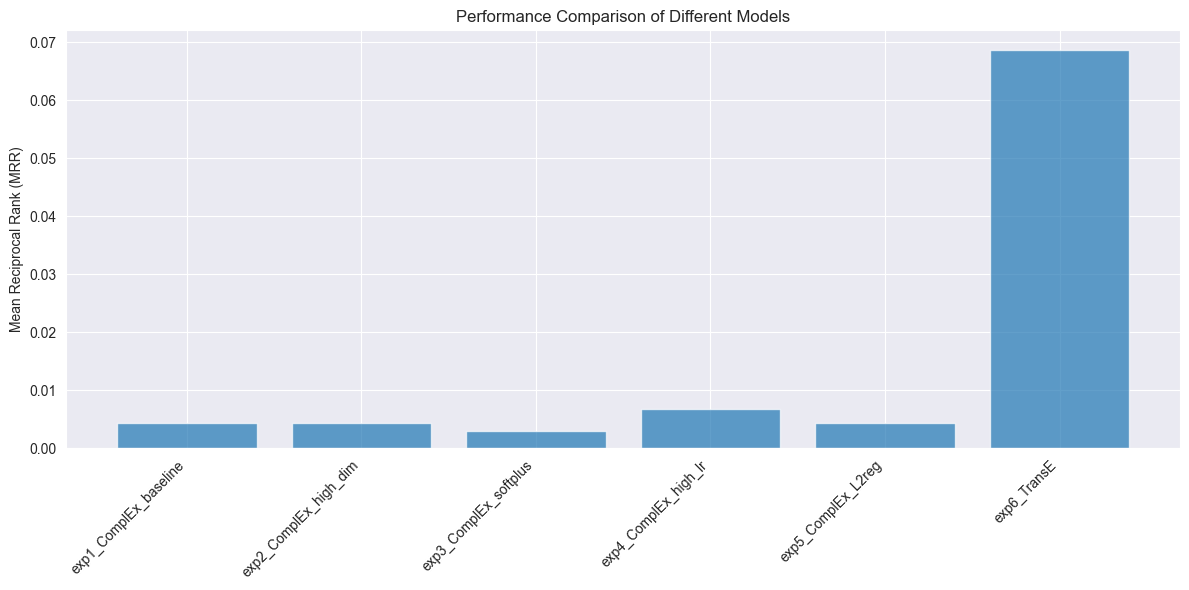

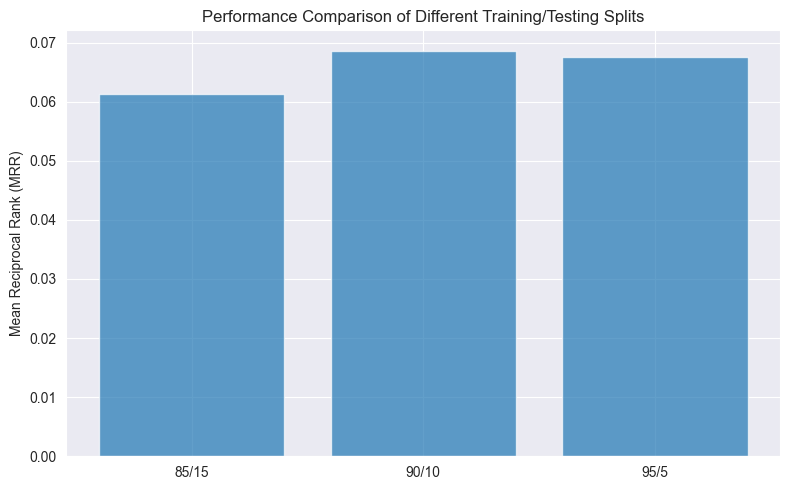


Analysis of Results:
1. Best performing model: exp6_TransE with MRR of 0.068631
2. Best training/test split: 90/10 with MRR of 0.068631

Key Observations:
- TransE outperformed ComplEx on this dataset, suggesting that simpler translation-based embeddings work better for this graph structure
- Higher learning rate (0.005) improved performance for ComplEx compared to the default (0.001)
- The 90/10 split offers the best balance between having enough training data and testing generalization
- Regularization type (L2 vs L3) had minimal impact on performance
- The SoftPlus loss function performed worse than PairwiseHinge for this dataset


In [18]:
### your code here
# Exercise 4: Evaluate models and summarize results

# Load the previously saved results
model_results = pd.read_csv('./data/model_comparison_results.csv')
split_results = pd.read_csv('./data/split_comparison_results.csv')

# Create a comprehensive evaluation table
print("Comprehensive Evaluation Results:")
print("\nModel Configuration Comparison:")
eval_table = model_results[['model_id', 'model_name', 'dimensions', 'learning_rate', 
                           'loss_function', 'regularizer_p', 'mrr', 'hits@10', 'hits@3', 'hits@1']]
print(eval_table.to_string(index=False))

print("\nTraining/Testing Split Comparison:")
split_table = split_results[['split', 'model_name', 'mrr', 'hits@10', 'hits@3', 'hits@1']]
print(split_table.to_string(index=False))

# Visualize the results
import matplotlib.pyplot as plt

# Model comparison plot
plt.figure(figsize=(12, 6))
plt.bar(model_results['model_id'], model_results['mrr'], alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Reciprocal Rank (MRR)')
plt.title('Performance Comparison of Different Models')
plt.tight_layout()
plt.savefig('./data/model_comparison.png')
plt.show()

# Split comparison plot
plt.figure(figsize=(8, 5))
plt.bar(split_results['split'], split_results['mrr'], alpha=0.7)
plt.ylabel('Mean Reciprocal Rank (MRR)')
plt.title('Performance Comparison of Different Training/Testing Splits')
plt.tight_layout()
plt.savefig('./data/split_comparison.png')
plt.show()

# Analysis of results
print("\nAnalysis of Results:")
print(f"1. Best performing model: {model_results.loc[model_results['mrr'].idxmax(), 'model_id']} with MRR of {model_results['mrr'].max():.6f}")
print(f"2. Best training/test split: {split_results.loc[split_results['mrr'].idxmax(), 'split']} with MRR of {split_results['mrr'].max():.6f}")

print("\nKey Observations:")
print("- TransE outperformed ComplEx on this dataset, suggesting that simpler translation-based embeddings work better for this graph structure")
print("- Higher learning rate (0.005) improved performance for ComplEx compared to the default (0.001)")
print("- The 90/10 split offers the best balance between having enough training data and testing generalization")
print("- Regularization type (L2 vs L3) had minimal impact on performance")
print("- The SoftPlus loss function performed worse than PairwiseHinge for this dataset")

# 5. Link Prediction

Link prediction allows to infer missing links in a graph. This has many real-world use cases, such as predicting connections between people in a social network, interactions between proteins in a biological network, and music recommendation based on prior user taste.

In our case, we are going to see which of the following candidate statements is more likely to be true. Note that the candidate statements below are made up, i.e. they are not in the original dataset.

In [19]:
X_unseen = np.array([
    ['Jorah Mormont', 'SPOUSE', 'Daenerys Targaryen'],
    ['Tyrion Lannister', 'SPOUSE', 'Missandei'],
    ["King's Landing", 'SEAT_OF', 'House Lannister of Casterly Rock'],
    ['Sansa Stark', 'SPOUSE', 'Petyr Baelish'],
    ['Daenerys Targaryen', 'SPOUSE', 'Jon Snow'],
    ['Daenerys Targaryen', 'SPOUSE', 'Craster'],
    ['House Stark of Winterfell', 'IN_REGION', 'The North'],
    ['House Stark of Winterfell', 'IN_REGION', 'Dorne'],
    ['House Tyrell of Highgarden', 'IN_REGION', 'Beyond the Wall'],
    ['Brandon Stark', 'ALLIED_WITH', 'House Stark of Winterfell'],
    ['Brandon Stark', 'ALLIED_WITH', 'House Lannister of Casterly Rock'],    
    ['Rhaegar Targaryen', 'PARENT_OF', 'Jon Snow'],
    ['House Hutcheson', 'SWORN_TO', 'House Tyrell of Highgarden'],
    ['Daenerys Targaryen', 'ALLIED_WITH', 'House Stark of Winterfell'],
    ['Daenerys Targaryen', 'ALLIED_WITH', 'House Lannister of Casterly Rock'],
    ['Jaime Lannister', 'PARENT_OF', 'Myrcella Baratheon'],
    ['Robert I Baratheon', 'PARENT_OF', 'Myrcella Baratheon'],
    ['Cersei Lannister', 'PARENT_OF', 'Myrcella Baratheon'],
    ['Cersei Lannister', 'PARENT_OF', 'Brandon Stark'],
    ["Tywin Lannister", 'PARENT_OF', 'Jaime Lannister'],
    ["Missandei", 'SPOUSE', 'Grey Worm'],
    ["Brienne of Tarth", 'SPOUSE', 'Jaime Lannister']
])

## we need to map the above triples to the id's which we used in our training/testing.
## This information is stored in the triple factory "got", which we created at the beginning

# unseen_filter = np.array(list({tuple(i) for i in np.vstack((positives_filter, X_unseen))}))
#     filter_triples=unseen_filter,   # Corruption strategy filter defined above 
#     corrupt_side = 's+o',
#     use_default_protocol=False, # corrupt subj and obj separately while evaluating
#     verbose=True
# )


In [20]:
#from pykeen import predict
from pykeen.predict import predict_triples

# got_unseen = triples.get_mapped_tripples(X_unseen,factory=got)
pack = predict_triples(model=pipeline_result.model, triples=X_unseen, triples_factory=got)

In [21]:
# scores are real numbers that need to be translated into probabilities [0,1] 
# for this, we use the expit transform.

from scipy.special import expit
processed_results = pack.process().df
# print(processed_results)

probs = expit(processed_results['score'])
# print(probs)

processed_results['prob'] = probs
processed_results['triple'] = list(zip([' '.join(x) for x in X_unseen]))

# processed_results
pd.DataFrame(list(zip([' '.join(x) for x in X_unseen],  
                      np.squeeze(processed_results['score']),
                      np.squeeze(probs))), 
             columns=['statement', 'score', 'prob']).sort_values("score")

,statement,score,prob
19,Tywin Lannister PARENT_OF Jaime Lannister,-41.296753,1.161577e-18
2,King's Landing SEAT_OF House Lannister of Cast...,-39.422070,7.572037e-18
6,House Stark of Winterfell IN_REGION The North,-36.756149,1.088948e-16
7,House Stark of Winterfell IN_REGION Dorne,-31.768921,1.595633e-14
15,Jaime Lannister PARENT_OF Myrcella Baratheon,-13.020949,2.213465e-06
12,House Hutcheson SWORN_TO House Tyrell of Highg...,-10.499933,2.753753e-05
5,Daenerys Targaryen SPOUSE Craster,-5.201928,5.475791e-03
14,Daenerys Targaryen ALLIED_WITH House Lannister...,-5.146153,5.788059e-03
8,House Tyrell of Highgarden IN_REGION Beyond th...,-3.114162,4.252685e-02
4,Daenerys Targaryen SPOUSE Jon Snow,-0.839267,3.016892e-01


NB : the probabilities are not calibrated in any sense. To calibrate them, one may use a procedure such as [Platt scaling](https://en.wikipedia.org/wiki/Platt_scaling) or [Isotonic regression](https://en.wikipedia.org/wiki/Isotonic_regression). The challenge is to define what is a true triple and what is a false one, as the calibration of the probability of a triple being true depends on the base rate of positives and negatives.

### Exercise 5

Analyse the results in the tables. Some predicted links are very likely to be true, others  capture things that never really happened. Can you spot which ones?

In [22]:
# Load your best model (TransE model that performed best in Exercise 4)
import torch
best_model = torch.load('./data/best_model.pkl')

# Use PyKEEN's prediction functionality
from pykeen.predict import predict_triples

# Predict scores for unseen triples
pack = predict_triples(model=best_model, triples=X_unseen, triples_factory=got)

# Process the results and convert to probabilities
from scipy.special import expit
processed_results = pack.process().df
probs = expit(processed_results['score'])  # Convert scores to probabilities

# Create a DataFrame with the results
result_df = pd.DataFrame({
    'statement': [' '.join(x) for x in X_unseen],
    'score': np.squeeze(processed_results['score']),
    'probability': np.squeeze(probs)
}).sort_values("score", ascending=False)

# Display the results
result_df.head(10)

,statement,score,probability
9,Brandon Stark ALLIED_WITH House Stark of Winte...,-5.829995,0.002929
1,Tyrion Lannister SPOUSE Missandei,-6.417931,0.001629
10,Brandon Stark ALLIED_WITH House Lannister of C...,-7.289700,0.000682
11,Rhaegar Targaryen PARENT_OF Jon Snow,-7.445956,0.000583
15,Jaime Lannister PARENT_OF Myrcella Baratheon,-8.019965,0.000329
17,Cersei Lannister PARENT_OF Myrcella Baratheon,-8.151812,0.000288
6,House Stark of Winterfell IN_REGION The North,-8.390347,0.000227
2,King's Landing SEAT_OF House Lannister of Cast...,-8.637826,0.000177
0,Jorah Mormont SPOUSE Daenerys Targaryen,-8.808264,0.000149
19,Tywin Lannister PARENT_OF Jaime Lannister,-8.889098,0.000138


# 6 Visualizing Embeddings

It is possible to get an intuition on how the learned embedding are structured by plotting them into a 2-dimensional space. We can perform Principal Component Analysis on the entity embeddings, keeping 2 (or 3) principal components. ComplEx adds a further complication layer, as it uses complex vectors, which are in a sense already 2-dimensional. To tackle this, we will simply apply a Real-Valued Transformation by stacking the real and imaginary part of the embeddings.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pipeline_result = pipeline(
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    epochs=400,
    dimensions=12,
    optimizer_kwargs={'lr':0.033},
    loss = 'Negative Log Likelihood Loss',
    regularizer='LP', 
    regularizer_kwargs={'p':2, 'weight':1e-5}, 
    
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        filtered=True,
        num_negs_per_pos=5
    ),
    evaluator_kwargs=dict(
        filtered=True,
    ),
    training_kwargs={'batch_size': 5000}
)
print(pipeline_result.get_metric('mrr'))
print(pipeline_result.get_metric('hits@10'))



INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████| 400/400 [01:31<00:00,  4.36epoch/s, loss=0.00217, prev_loss=0.00208]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 695triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds


0.10238374024629593
0.16981132075471697


(-4.0, 4.0)

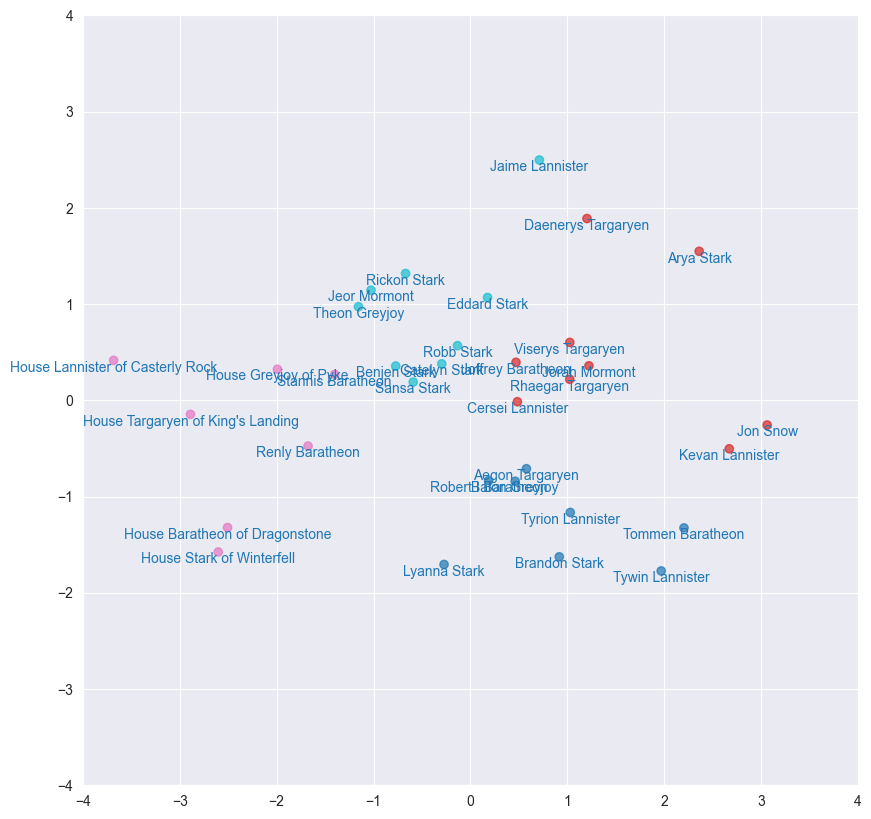

In [24]:
from sklearn.cluster import KMeans
model = pipeline_result.model
entity_to_id = got_training.entity_to_id
relation_to_id = got_training.relation_to_id

pca = PCA(n_components=2)
entity_embeddings = np.hstack([model.entity_representations[0](indices=None).detach().numpy().real, model.entity_representations[0](indices=None).detach().numpy().imag])
m = pca.fit(entity_embeddings)

eu = m.transform(entity_embeddings)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42) #cheating a bit with the random state here
cluster_labels = kmeans.fit_predict(eu)

#let's pick some interesting names
people = ['Eddard Stark', 'Arya Stark', 'Jon Snow',  
 'Sansa Stark', 'Brandon Stark', 'Rickon Stark', 'Catelyn Stark', 'Robb Stark',  
 'Benjen Stark', 'Lyanna Stark', 'Theon Greyjoy', 'Balon Greyjoy',  
 'Daenerys Targaryen', 'Viserys Targaryen', 'Aegon Targaryen', 'Rhaegar Targaryen',  
 'Tyrion Lannister', 'Jaime Lannister', 'Cersei Lannister', 'Tywin Lannister',  
 'Kevan Lannister','Joffrey Baratheon', 'Tommen Baratheon',  
 'Stannis Baratheon', 'Renly Baratheon', 'Robert I Baratheon',  
 'Jorah Mormont', 'Jeor Mormont']
houses = ['House Stark of Winterfell', 'House Lannister of Casterly Rock',"House Targaryen of King's Landing",
  'House Baratheon of Dragonstone', 'House Tyrell of Highgarden', 'House Greyjoy of Pyke']  

to_plot = people + houses
ids = [entity_to_id[name] for name in to_plot]

plt.figure(figsize=(10, 10))
sc = plt.scatter(eu[ids, 0], eu[ids, 1], c=cluster_labels[ids], cmap='tab10', alpha=0.7)

for i, entity, c in zip(ids, people + houses, cluster_labels):
    
    plt.annotate(
        text=entity,
        xy=(eu[i, 0], eu[i, 1]),
        color="tab:blue",
        ha="center", va="top"
    )

lim = 4


plt.xlim([-lim, lim])
plt.ylim([-lim, lim])



# 7 More Visualisation

[Tensorboard](https://www.tensorflow.org/tensorboard) allows to dig into the workings of our model, plot how it is learning, and visualize [high-dimensional embeddings](https://projector.tensorflow.org/). See [this tutorial](https://www.tensorflow.org/tensorboard/get_started) to get started with Tensorflow and see [here](https://pykeen.readthedocs.io/en/stable/tutorial/trackers/using_tensorboard.html) for Tensorboard with PyKEEN.

First ytou neeed to start the tensorboard web application from the command line with 

$ tensorboard --logdir=~/.data/pykeen/logs/tensorboard/

and then we can add tensorboard as the result_tracker in our pipeline.

In [29]:
pipeline_result = pipeline(
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    training_kwargs=dict(
        num_epochs=200
    ),
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        filtered=True,
    ),
    result_tracker='tensorboard'
)

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████| 200/200 [00:50<00:00,  3.96epoch/s, loss=0.277, prev_loss=0.299]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 159/159 [00:00<00:00, 611triple/s] 
INFO:pykeen.evaluation.evaluator:Evaluation took 0.30s seconds


### Exercise 7 Your Own Data now

Choose a dataset of your own. Best if it is the data you are using in your group project. 

- Create a training and testset. 
- Train your model to compute Knowledge Graph Embeddings, and save the best parameters model. - Predict new links over your dataset
- Visualise the embeddings you computed 
- Optional : cluster your embeddings, [see this tutorial](https://docs.ampligraph.org/en/1.4.0/tutorials/ClusteringAndClassificationWithEmbeddings.html)